In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm
%matplotlib inline

## Part 1

### Exercise 1

Consider the data set below

In [2]:
data = np.array([4.04078064, -0.55665445, 3.05080334, 5.08400317, 2.72089663, 0.71922335, 0.95069126, 5.43223656, 3.50298766, -1.69666696, 0.16887197, 0.97921115, 4.81828023, 2.13361239, 2.31649532, 2.45398909, 2.95186638, 0.35927233, 1.53276119, 1.51244625, 2.05198596, -0.10338973, 2.18330019, 1.20449377, 1.77198419, 2.36079822, 4.24525693, 1.28167319, -0.4782344 , 2.15987517, 1.04436119, -3.31367483, 1.90677577, -1.52585791, 1.30861677, 3.92755598, 5.28340674, 2.46339939, 2.92340074, 6.86935904, 4.36460648, 4.31874289, 3.4310631 , 4.56743957, 1.89164429, 3.07432364, -1.09259307, 0.20645733, 1.9716586 , 0.48545271, 0.95117389, 1.17221689, 4.56967222, 1.00717303, 5.42222525, 3.16312747, 0.85955611, 2.1542952 , 3.32612246, 3.12462947, 0.4495974 , 1.6291549 , 1.31738387, 2.73270522, 0.40173961, 1.66718506, -2.60436878, 3.89440908, 2.06121341, 0.65197735, 5.40756812, 7.0944758 , 0.88894319, 0.96374457, -1.26270571, 2.19074211, 0.06566279, 2.01504511, 4.42887827, -0.71989433, 4.0375403 , 5.5868948 , 4.05289467, 1.25946927, -1.1316249 , -0.35446895, 6.1372851 , 0.14735692, 5.40410798, 5.33778763, 5.54798016, 3.39152955, 2.3835751 , 0.03465975, 0.81116816, 4.39280317, 1.85958392, 2.27926744, 1.51646355, 2.66025771])

Assume a Gaussian distribution for the data.
* Calculate maximum likelihood estimates for the paarmeters
* Visualize the data and the model

#### Solution

The data has been generated by data = np.random.normal(2,2,size=100)

In [3]:
mu_hat = np.mean(data)
sigma_hat = np.mean((data-mu_hat)**2)
print(f'mu_hat: {mu_hat}')
print(f'sigma_hat: {sigma_hat}')


mu_hat: 2.1763716977
sigma_hat: 4.341269486917946


(array([0.01921571, 0.02882356, 0.05764713, 0.12490211, 0.20176495,
        0.20176495, 0.1056864 , 0.1056864 , 0.08647069, 0.02882356]),
 array([-3.31367483, -2.27285977, -1.2320447 , -0.19122964,  0.84958542,
         1.89040048,  2.93121555,  3.97203061,  5.01284567,  6.05366074,
         7.0944758 ]),
 <BarContainer object of 10 artists>)

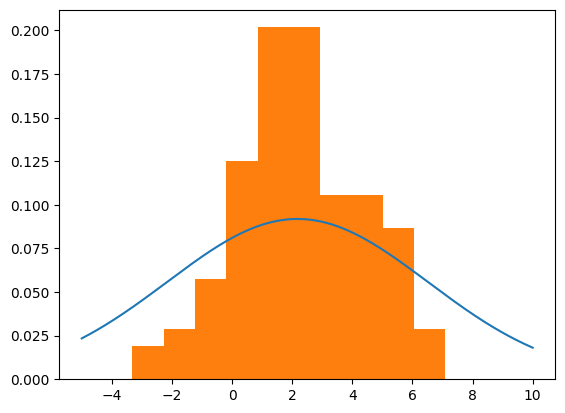

In [4]:
x = np.linspace(-5, 10, 1000)
y = norm.pdf(x,mu_hat, sigma_hat)
plt.plot(x,y)
plt.hist(data, density=True)

### Exercise 2 

Consider a poker game consisting of two rounds, and where each player is initially dealt three cards. During the first round all three cards can be changed (FC), but during the second round at most two cards can be changed (SC). When deciding on whether to call or fold you can taken into account the number of cards changed by your opponent as well as your current hand (MH). After playing 20 games we have the results in Table 1, where BH shows who has the best hand.

In [5]:
df = pd.read_csv('./poker_data.csv')
print(df)

      BH   MH  FC  SC
0     op   no   3   1
1     op   1a   2   1
2   draw   2v   1   1
3     me   2a   1   1
4   draw   fl   1   1
5     me   st   3   2
6     me   3v   1   1
7     me  sfl   1   0
8     op   no   0   0
9     op   1a   3   2
10  draw   2v   2   1
11    me   2v   3   2
12    op   2v   1   1
13    op   2v   3   0
14    me   2v   3   2
15  draw   no   3   2
16  draw   2v   1   1
17    op   fl   1   1
18    op   no   3   2
19    me   1a   3   2


* Construct a naive Bayes classifier for the poker domain. 
* Use the data cases to learn the maximum likelihood parameters in the model; if you feel comfortable with the estimation procedure, you only need to estimate the probabilities required for solving the exercise below. 
* What is the posterior distribution of BH given MH=1a, FC=1, and SC=1? 
* Do you see any potential issues with the posterior and how could you address it?

In [6]:
# Hint: You can calculate counts using, e.g.:
df[(df.FC==1) & (df.BH=='me')].shape[0]

3

### Solution 
ML parameters in the model have been calculated using simple frequency counting. For example, for $P(FC=1| BH=op)$ we get
$$
P(FC=1| BH=op) = \frac{N(FC=1, BH=op)}{N(BH=op)} = \frac{2}{8} = \frac{1}{4}.
$$ 

In [7]:
for bh in df.BH.unique():
    for fc in df.FC.unique():
        print(f'P(FC={fc} | BH={bh}) = {df[(df.FC==fc) & (df.BH==bh)].shape[0] / df[(df.BH==bh)].shape[0]:.3}')


P(FC=3 | BH=op) = 0.5
P(FC=2 | BH=op) = 0.125
P(FC=1 | BH=op) = 0.25
P(FC=0 | BH=op) = 0.125
P(FC=3 | BH=draw) = 0.2
P(FC=2 | BH=draw) = 0.2
P(FC=1 | BH=draw) = 0.6
P(FC=0 | BH=draw) = 0.0
P(FC=3 | BH=me) = 0.571
P(FC=2 | BH=me) = 0.0
P(FC=1 | BH=me) = 0.429
P(FC=0 | BH=me) = 0.0


By estimating the remaining entries in the conditional probability tables and inserting the evidence
$MH=1a,FC=1,SC=1$, we get the posterior probability 
$$P(BH|MH=1a,FC=1,SC=1) = (0.671_{op},0.329_{me},0_{dr}),$$
which can be calculated from:
$$\begin{split}
P(BH&|MH=1a,FC=1,SC=1) \\
&= \frac{P(BH)P(MH=1a|BH)P(FC=1|BH)P(SC=1|BH)}{\sum_{BH}P(BH)P(MH=1a|BH)P(FC=1|BH)P(SC=1|BH)}.
\end{split}
$$

By adding fractional pseudo counts we can avoid the zero probabilities

In [8]:
for bh in df.BH.unique():
    for fc in df.FC.unique():
        print(f'P(FC={fc} | BH={bh}) = {(df[(df.FC==fc) & (df.BH==bh)].shape[0] + 1/df.FC.unique().shape[0]) / (df[(df.BH==bh)].shape[0]+1):.3}')


P(FC=3 | BH=op) = 0.472
P(FC=2 | BH=op) = 0.139
P(FC=1 | BH=op) = 0.25
P(FC=0 | BH=op) = 0.139
P(FC=3 | BH=draw) = 0.208
P(FC=2 | BH=draw) = 0.208
P(FC=1 | BH=draw) = 0.542
P(FC=0 | BH=draw) = 0.0417
P(FC=3 | BH=me) = 0.531
P(FC=2 | BH=me) = 0.0312
P(FC=1 | BH=me) = 0.406
P(FC=0 | BH=me) = 0.0312


## Part 2

### Setup

In [9]:
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from scipy.stats import multivariate_normal
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [10]:
# Load the iris data set
iris = datasets.load_iris()

# Prepare data ...
X_train = iris.data
y_train = iris.target
print(f'Number of data points: {X_train.shape[0]}')


Number of data points: 150


In [11]:
# and set the scene
num_clusters = 3
colors = ['r', 'g', 'b']
covariance_type = 'diag' #‘full’, ‘tied’, ‘diag’, ‘spherical’


In [12]:
# For the contour plots
min_x, max_x = np.min(X_train[:,0]), np.max(X_train[:,0])
min_y, max_y = np.min(X_train[:,1]), np.max(X_train[:,1])
N = 200
X = np.linspace(min_x, max_x, N)
Y = np.linspace(min_y, max_y, N)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X, Y))


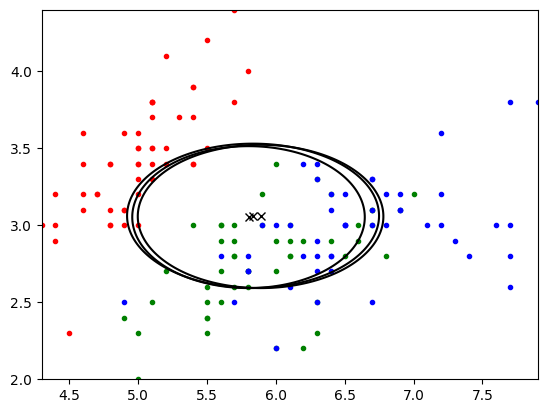

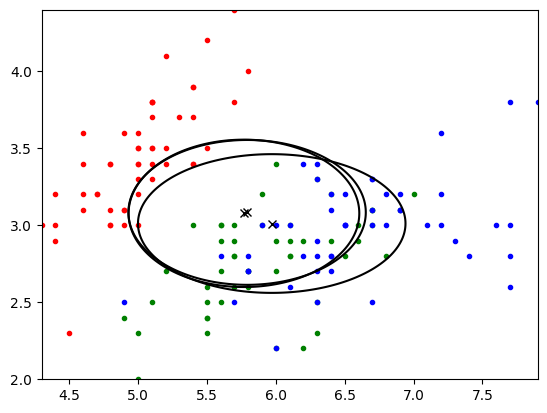

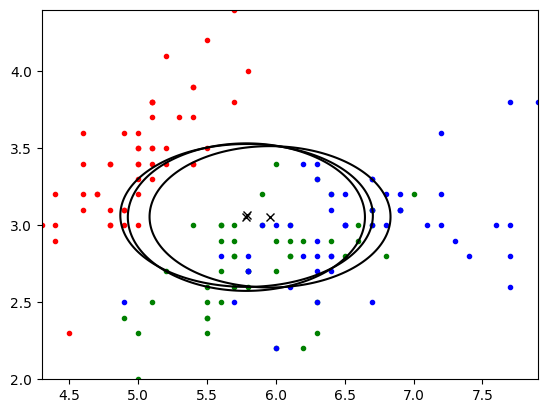

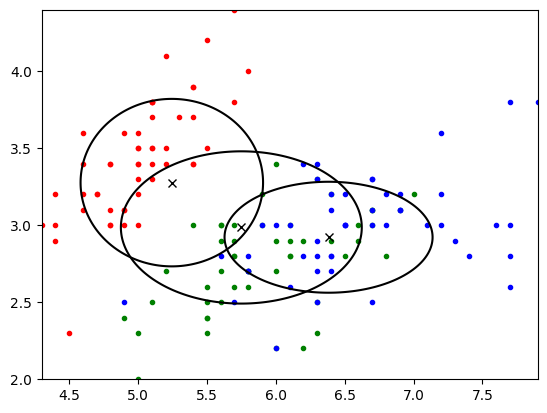

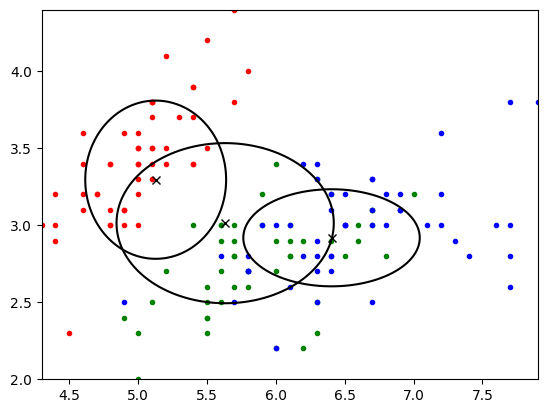

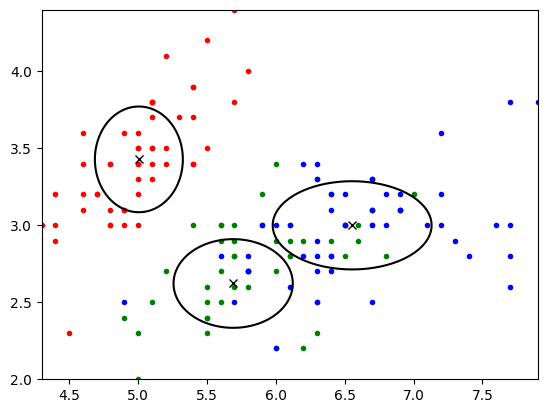

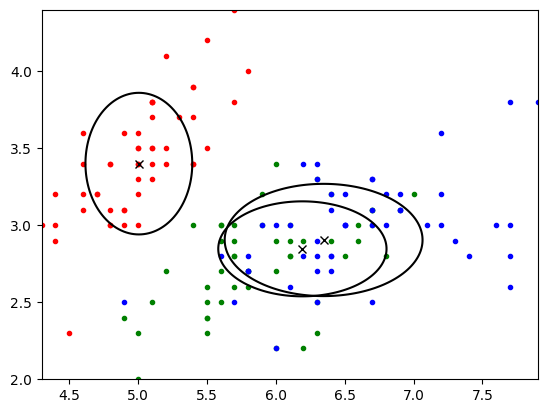

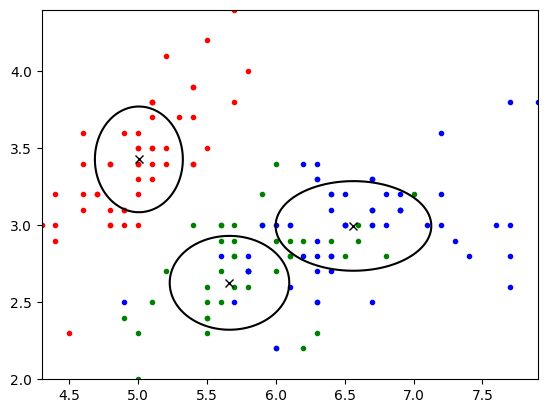

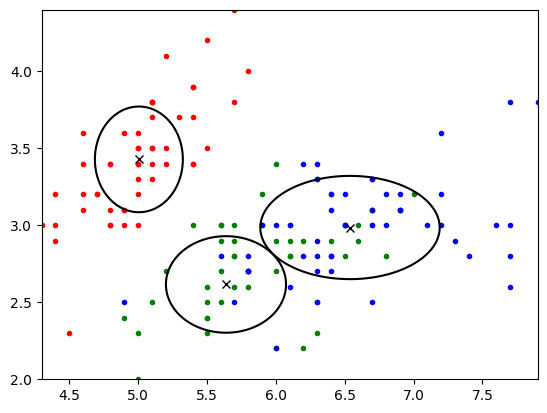

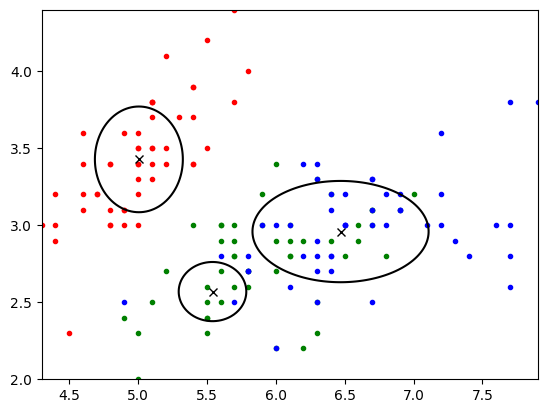

In [13]:
# And now play around
num_iter = range(0,10)

for i in num_iter:
    for idx, color in enumerate(colors):
        plt.plot(X_train[y_train==idx, 0], X_train[y_train==idx,1], '.', color=color)

    gmm = GaussianMixture(n_components=num_clusters, init_params='random', max_iter = i, covariance_type=covariance_type)
    gmm.fit(X_train)
    for idx in range(num_clusters):
        plt.plot(gmm.means_[idx, 0], gmm.means_[idx, 1], 'x', color='black')

        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[idx][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[idx][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[idx]

        rv = multivariate_normal(gmm.means_[idx,:2], covariances)
        Z = rv.pdf(pos)

        plt.contour(X, Y, Z, levels=1, colors='black')

    plt.show()


# Exam Topic

### Exercise

Perform one more iteration of the EM-algorithm in the example on Slide 24. You may consider using Pyrhon or Hugin to calculate the required probabilities. 
![Learning Parameters with incomplete data](screenshot_1.png)

**NOTE** In this dataset we have missing values. This makes using Maksimum Likelihood Estimatation (MLE) not decomposable, thus we need other methods for parameter learning such as the Expectation Maximization (EM) algorithm.

* **Missing completely at random (MCAR)** The probability that a value is missing is independent of both the observed and unobserved values.
    - Makes Partial Likelihood decomposition possible by marginalising missing values.

* **Missing at random (MAR)** The probability that a value is missing depends only on the observed values.

![Missing values](screenshot_2.png)

The data from the exercise is MAR.

**Expectation Maximization (EM)** Use hypothetical completions of data sets obtained from current estimate for $\theta$, and apply maximum likelihood inference to completed data to obtain new estimate for $\theta$.

EM is an iterative method for estimating missing values. At each iteration it performs two tasks:
* **Expectation (E-step):** Using current parameter $\mathbf{\theta}^k$, compute expected sufficient statistics for each parameter.
* **Maximization (M-step):** Find the next parameter $\mathbf{\theta}^{k+1}$ by maximizing the likelihood.

**REMARKS**

- EM is guranteed to increase the likelihood at each iteration.
- EM does NOT gurantee global optimum.


### Solution

We assume some initial dsitributions given as $P_0(\cdot)$ as seen on the first image.

To estimate $P_1(Ut|Pr) = E[N(Ut,Pr)]/E[N(Pr)]$ we get that

## E-step

$E[N(Pr=yes)] = P_0(Pr = yes | Bt=Ut=pos) + 1 +1 +1 + P_0(Pr = yes | Bt = neg) = 0.5 + 1 + 1 + 1 + 0.5 = 4$

$E[N(Pr=no)] = P_0(Pr = no | Bt=Ut=pos) + 0 +0 +0 + P_0(Pr = no | Bt = neg) = 0.5 + 0 + 0 + 0 + 0.5 = 1$

$E[N(Ut = pos,Pr = yes)] = P_0(Ut=pos, Pr=yes | Bt=Ut=pos) + 1 + P_0(Ut=pos, Pr=yes | Bt=pos, Pr=yes) + 0 + P_0(Ut=pos, Pr=yes | Bt=neg) = 0.5 + 1 + 0.5 + 0 + 0.25 = 2.25$

$E[N(Ut = pos,Pr = no)] = P_0(Ut=pos, Pr=no | Bt=Ut=pos) + 0 + 0 + 0 + P_0(Ut=pos, Pr=no | Bt=neg) = 0.5 + 0 + 0 + 0 + 0.25 = 0.75$

$E[N(Bt = pos,Pr = yes)] = P_0(Bt=pos, Pr=yes | Bt=Ut=pos) + 0 + 1 + 1 + 0 = 0.5 + 0 + 1 + 1 + 0 = 2.5$

$E[N(Bt = pos,Pr = no)] = P_0(Bt=pos, Pr=no | Bt=Ut=pos) + 0 + 0 + 0 + 0 = 0.5 + 0 + 0 + 0 + 0 = 0.5$

---

## M-step
$P_1(Pr=yes) = 4/5$ and $P_1(Pr=no) = 1/5$

$P_1(Ut=pos|Pr=yes) = 2.25 / 4$ and $P_1(Ut=pos|Pr=no) = 0.75 / 1$

$P_1(Bt=pos|Pr=yes) = 2.5 / 4$ and $P_1(Bt=pos|Pr=no) = 0.5 / 1$

---

And now we repeat the process

In [14]:
E_PR = np.array([[4.54],[0.46]])
E_PR_UT = np.array([[2.7744, 1.7656],[0.3975, 0.0625]])
E_PR_BT = np.array([[2.79, 1.75],[0.21,0.25]])

As on the slides, we use these expected counts to find new (maximum
likelihood) estimates for the probability parameters:

In [15]:
print(f'P(PR) = \n {E_PR/E_PR.sum()}')
print(f'P(UT| PR) = \n{E_PR_UT/E_PR}')
print(f'P(BT| PR) = \n{E_PR_BT/E_PR}')


P(PR) = 
 [[0.908]
 [0.092]]
P(UT| PR) = 
[[0.61110132 0.38889868]
 [0.86413043 0.13586957]]
P(BT| PR) = 
[[0.61453744 0.38546256]
 [0.45652174 0.54347826]]


# End of Exam topic

## Part 3

In the thumbtack experiment, let the *unnormalized*
prior distribution for $\theta$ be

$$f(\theta) =
\begin{cases}
\theta\text{ if }\theta \le 1/2\\
(1-\theta)\text{ if }1/2\le \theta \le 1
\end{cases}
$$

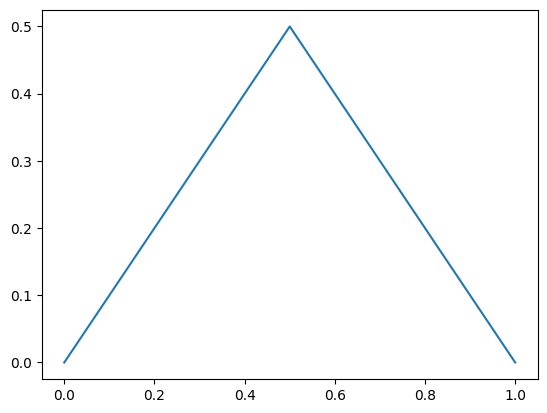

In [16]:
x = np.linspace(0,1,10000)
y = np.array([xp if xp <= 0.5 else (1-xp) for xp in x])
plt.plot(x,y)
plt.show()


### Exercise 

What is the normalization constant for the prior distribution?

Assume that we have performed one experiment resulting in $up$. What is now the posterior distribution for
$\theta$? Comparing your result with the prior distribution, do you see any challenges with the current model specification? 

### Solution

As
$$
\int_0^1f(\theta) d\theta = 2\cdot \int _0^{1/2} \theta d\theta = 2\cdot [\frac{1}{2}\theta^2]_0^{1/2} = 1/4
$$
the normalization constant is $4$. 

The posterior distribution is
$$f(\theta|up) = \frac{f(\theta) f(up| \theta)}{f(up)}$$

For the numerator we have
$$
f(\theta) f(up| \theta) =
\begin{cases}
\theta^2\text{ if }\theta \le 1/2\\
\theta(1-\theta)\text{ if }1/2\le \theta \le 1
\end{cases}
$$
hence, the denominator becomes
$$
\begin{split}
\int _0^1f(\theta) f(up| \theta)d\theta & = \int _0^{1/2}\theta^2 + \int_{1/2}^1\theta(1-\theta)d\theta\\
&= 3/24 = 1/8
\end{split}
$$

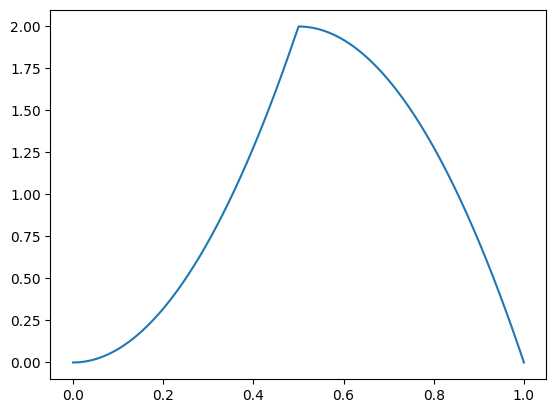

In [17]:
x = np.linspace(0,1,1000000)
y = np.array([xp**2 if xp <= 0.5 else xp*(1-xp) for xp in x])*8
plt.plot(x,y)
plt.show()


Note that the functional form changes when moving from the prior (linear in $\theta$) to the posterior (quadratic in $\theta$).

## Part 4

Reconsider the thumbtack model above, but replace the prior distribution over $\theta$ and a Beta distribution chosing suitable hyperparameters of your own chosing.

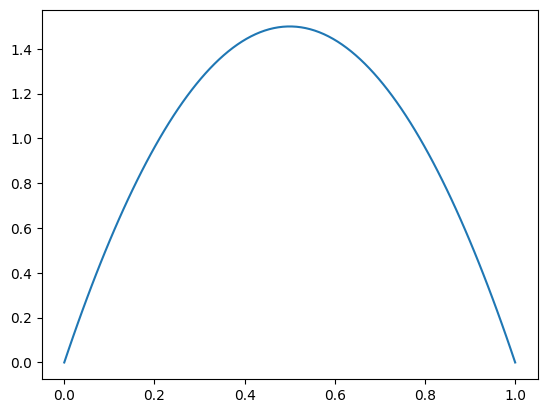

In [18]:
x = np.linspace(0,1,100)
y = beta.pdf(x,2,2)
plt.plot(x,y)


* What is the posterior distribution after seeing *pin up*? 

* How does the functional form compare to the posteror under the original prior distribution?

* How could you summarize the posterior distribution?

* Calculate the posterior predictive distribtion?